In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [40]:
df=pd.read_csv('/content/drive/MyDrive/UASBENGKOD/ObesityDataSet.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [41]:
# Tampilkan 5 baris pertama
print("Lima baris pertama:\n", df.head())

Lima baris pertama:
   Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weigh

In [42]:
# Informasi umum
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                         

In [43]:
# Cek deskripsi statistik numerik
print("\nDeskripsi statistik:\n", df.describe())


Deskripsi statistik:
          Age Gender Height Weight       CALC  FAVC  FCVC   NCP   SCC SMOKE  \
count   2097   2102   2099   2100       2106  2100  2103  2099  2101  2106   
unique  1394      3   1562   1518          5     3   808   637     3     3   
top       18   Male    1.7     80  Sometimes   yes     3     3    no    no   
freq     124   1056     58     58       1386  1844   647  1183  1997  2054   

        CH2O family_history_with_overweight   FAF   TUE       CAEC  \
count   2105                           2098  2103  2102       2100   
unique  1263                              3  1186  1130          5   
top        2                            yes     0     0  Sometimes   
freq     441                           1705   404   552       1747   

                       MTRANS      NObeyesdad  
count                    2105            2111  
unique                      6               7  
top     Public_Transportation  Obesity_Type_I  
freq                     1572             3

In [44]:
# Cek jumlah missing values
print("\nMissing values tiap kolom:\n", df.isnull().sum())


Missing values tiap kolom:
 Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [45]:
# Cek duplikat
print("\nJumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 18


In [46]:
# Cek jumlah nilai unik per kolom
print("\nJumlah nilai unik tiap kolom:\n", df.nunique())


Jumlah nilai unik tiap kolom:
 Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP                                637
SCC                                  3
SMOKE                                3
CH2O                              1263
family_history_with_overweight       3
FAF                               1186
TUE                               1130
CAEC                                 5
MTRANS                               6
NObeyesdad                           7
dtype: int64


In [47]:
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)
# Mengganti '?' dengan nilai NaN menggunakan np.nan
df.replace("?", np.nan, inplace=True)
df.isnull().sum()

,0
Age,22
Gender,22
Height,22
Weight,19
CALC,20
FAVC,22
FCVC,18
NCP,22
SCC,18
SMOKE,13


In [48]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [49]:
print(df['Age'].describe())
print(df['Age'].head(10))

count     1811
unique    1215
top         18
freq       106
Name: Age, dtype: object
0    21
1    21
2    23
3    27
4    22
5    29
6    23
7    22
8    24
9    22
Name: Age, dtype: object


In [50]:
print(df.nunique())

Age                               1215
Gender                               2
Height                            1361
Weight                            1321
CALC                                 4
FAVC                                 2
FCVC                               702
NCP                                551
SCC                                  2
SMOKE                                2
CH2O                              1097
family_history_with_overweight       2
FAF                               1032
TUE                                973
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64


In [51]:
# Periksa duplikasi data
print(df.duplicated().sum())

# Periksa nilai yang unik di kolom 'Age'
print(df['Age'].value_counts())

# Periksa nilai missing di kolom 'Age'
print(df['Age'].isnull().sum())


18
Age
18           106
26            86
21            83
23            78
19            50
            ... 
37.496175      1
38.464538      1
21.67315       1
25.483381      1
19.671876      1
Name: count, Length: 1215, dtype: int64
0


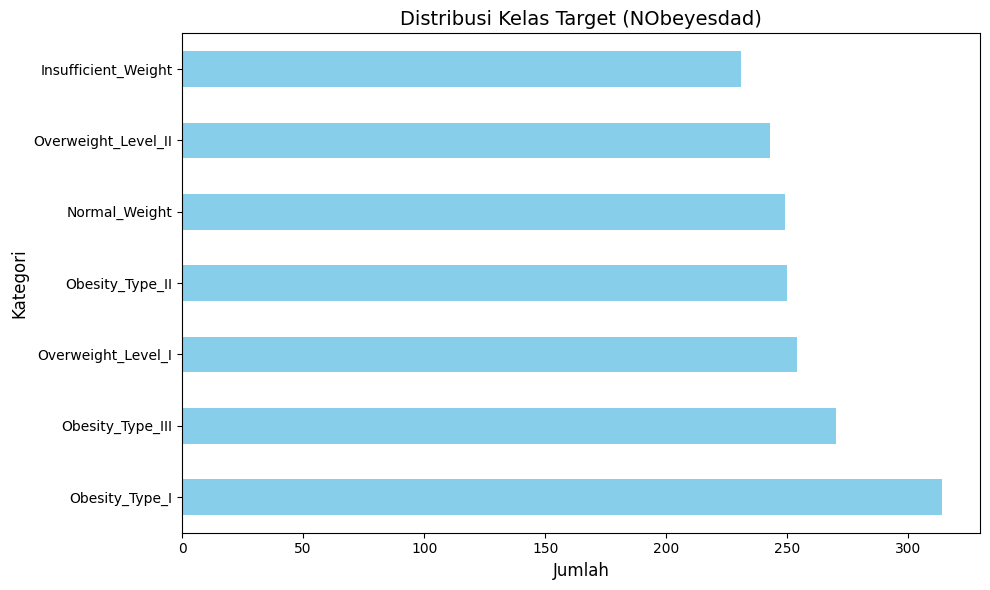

In [52]:
# Visualisasi distribusi kelas target dengan bar plot horizontal
plt.figure(figsize=(10, 6))
df['NObeyesdad'].value_counts().plot(kind='barh', color='skyblue')  # Menggunakan bar plot horizontal
plt.title('Distribusi Kelas Target (NObeyesdad)', fontsize=14)
plt.xlabel('Jumlah', fontsize=12)
plt.ylabel('Kategori', fontsize=12)
plt.tight_layout()
plt.show()


In [53]:
# Replace '?' with NaN in the dataset
df.replace('?', pd.NA, inplace=True)

# Convert numerical columns to numeric, forcing errors to NaN
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Handle missing values: fill NaN with median for numerical columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Label Encoding for categorical columns if necessary
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
label_encoder = LabelEncoder()

# Handle missing values in categorical columns before encoding
# Fill pd.NA with a placeholder string
for col in categorical_cols:
    # Use .astype(str) to ensure all values are strings before fillna
    # Then fill any remaining NaN (which might be there from the initial replace)
    # with a placeholder string
    df[col] = df[col].astype(str).fillna('Missing')
    # Ensure all values are strings before encoding
    df[col] = df[col].astype(str)
    df[col] = label_encoder.fit_transform(df[col])


# Scaling the numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

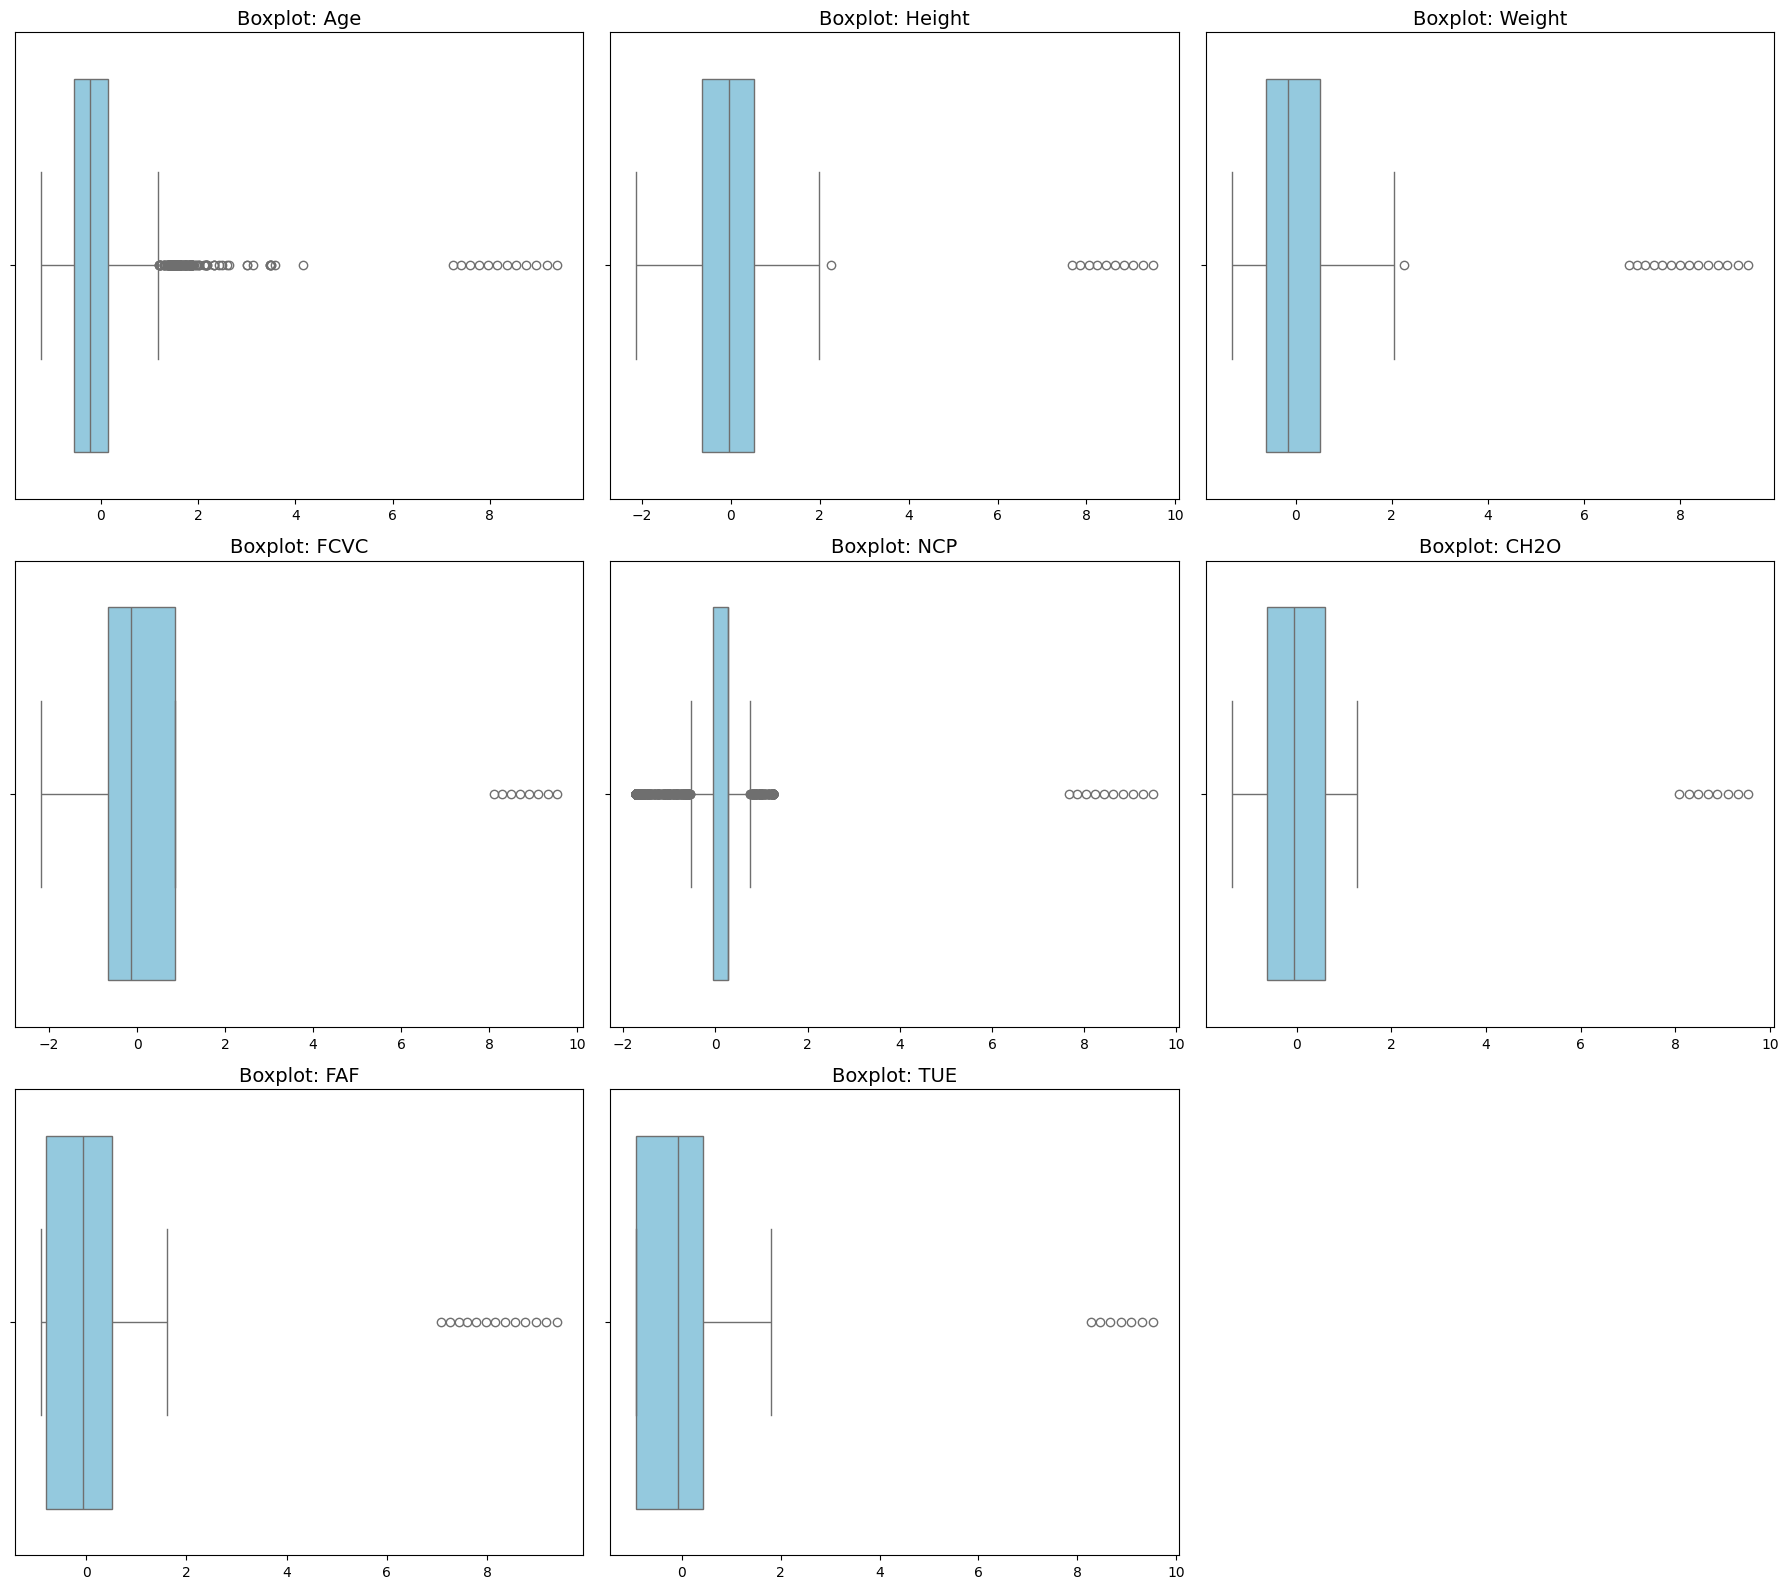

In [54]:

# Menampilkan boxplot untuk setiap kolom numerik dengan ukuran lebih besar
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(18, 16))  # Ukuran figure diperbesar agar boxplot lebih jelas

# Menampilkan boxplot untuk setiap kolom numerik
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=col, data=df, color='skyblue')  # Menggunakan warna yang lebih sederhana
    plt.title(f'Boxplot: {col}', fontsize=14)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [55]:
# Hapus spasi ekstra
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

<ipython-input-55-a12ad94f59c2>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [56]:
# Ganti '?' jadi NaN
df.replace('?', np.nan, inplace=True)

In [57]:
# Cek missing values
print("Missing values sebelum dibersihkan:\n", df.isnull().sum())

Missing values sebelum dibersihkan:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [58]:
# Tangani kolom numerik
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

In [59]:
# Isi missing value numerik dengan median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

In [60]:
# Tangani kolom kategorik
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [61]:
# Ganti NaN dengan kategori 'Missing'
for col in categorical_cols:
    df[col] = df[col].astype(str).fillna('Missing')

In [62]:
# Cek ulang
print("Missing values setelah dibersihkan:\n", df.isnull().sum())

Missing values setelah dibersihkan:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [63]:
print("Jumlah data duplikat:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Jumlah data duplikat: 18


In [64]:
# Buat salinan dataset agar aman
df_encoded = df.copy()

In [65]:
# Tentukan kolom kategori
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']

In [66]:
# Inisialisasi LabelEncoder
le = LabelEncoder()

In [67]:
# Encode semua kolom kategori
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [68]:
# Encode target label (NObeyesdad)
df_encoded['NObeyesdad'] = le.fit_transform(df_encoded['NObeyesdad'])

In [70]:
# Tampilkan 5 baris awal setelah encoding
print(df_encoded.head())

        Age  Gender    Height    Weight  CALC  FAVC      FCVC       NCP  SCC  \
0 -0.435562       0 -0.720540 -0.661782     3     0 -0.666491  0.263882    0   
1 -0.435562       0 -1.548080 -0.875466     2     0  0.856058  0.263882    1   
2 -0.205545       1  0.769030 -0.314546     1     0 -0.666491  0.263882    0   
3  0.254490       1  0.769030 -0.047442     1     0  0.856058  0.263882    0   
4 -0.320554       1  0.603523  0.027347     2     0 -0.666491 -1.719333    0   

   SMOKE      CH2O  family_history_with_overweight       FAF       TUE  CAEC  \
0      0 -0.047985                               1 -0.909716  0.437839     2   
1      1  1.277192                               1  1.611868 -0.924819     2   
2      0 -0.047985                               1  0.771340  0.437839     2   
3      0 -0.047985                               0  0.771340 -0.924819     2   
4      0 -0.047985                               0 -0.909716 -0.924819     2   

   MTRANS  NObeyesdad  
0       3     

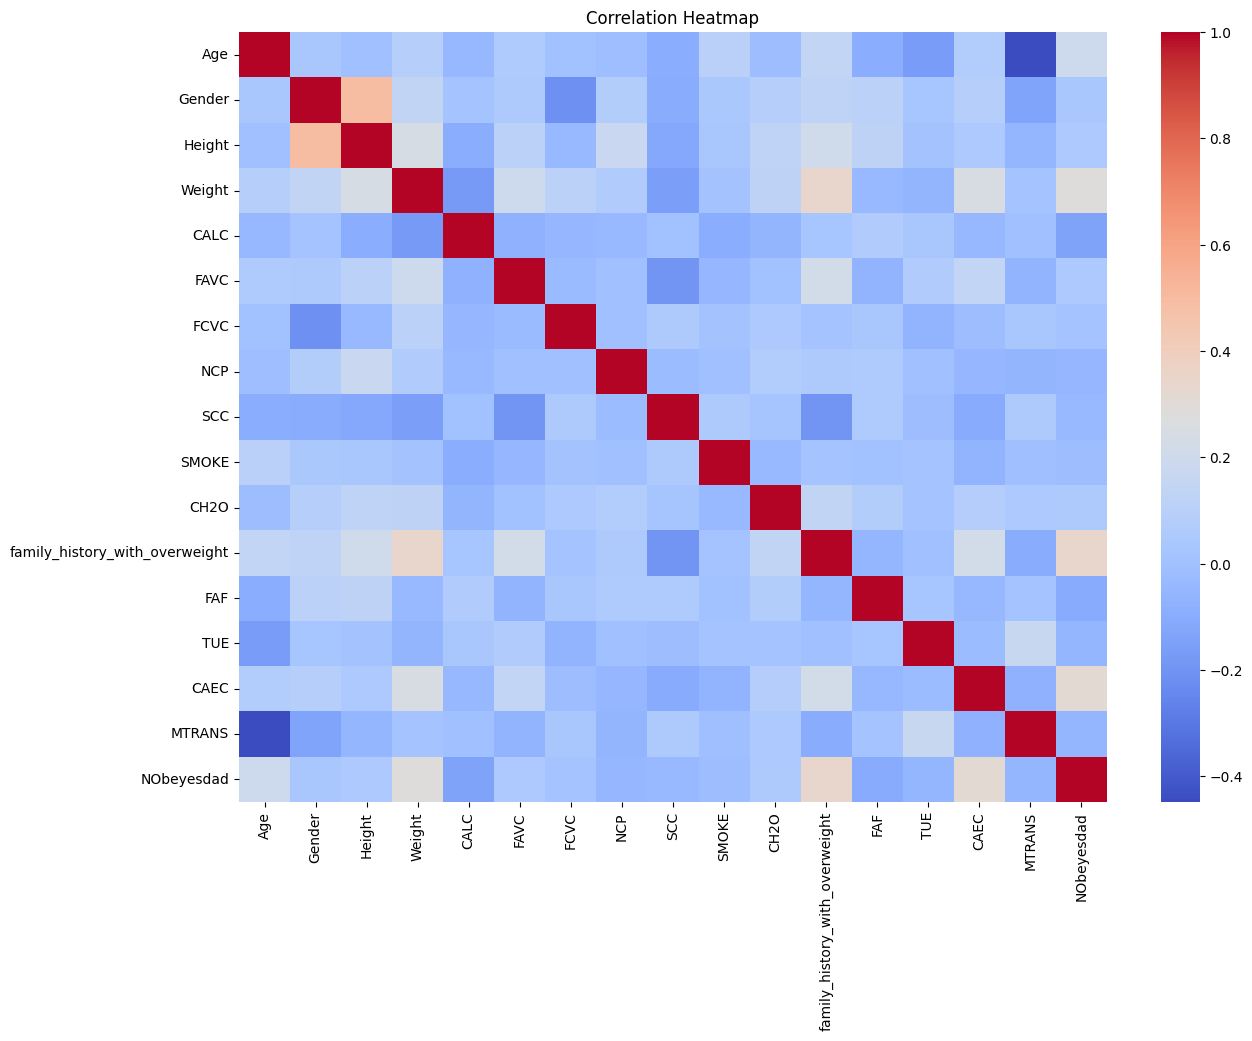

In [71]:
#cek korelasi antar fitur
plt.figure(figsize=(14, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [72]:
print(df_encoded.nunique())

Age                               1215
Gender                               2
Height                            1361
Weight                            1321
CALC                                 4
FAVC                                 2
FCVC                               702
NCP                                551
SCC                                  2
SMOKE                                2
CH2O                              1097
family_history_with_overweight       2
FAF                               1032
TUE                                973
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64
